## Tensorflow


 Familiarize yourself with TensorFlow
1. Use the UCI heart dataset to develop a simple NN classifier (one
hidden layer with 10 units) that predicts the presence of a heart
disease (field „goal“) <br>
 a. Try adam and RMSprop as optimizers
2ן Evaluate the NN classifier properly within a nested cross-validation <br>
 b. How does the model compare against your previously developed RF classifier?

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
import numpy as np
import glob
import os 
import tensorflow as tf
tf.keras.backend.clear_session()

In [4]:
def preprocess(file):  
    data = [ x.split(',') for x in file.split('\n')[:-1]] # first split by the escape and then comma
    data = pd.DataFrame(data)
    data = data.replace('?', np.nan)
    data.dropna(inplace = True)
    return data

def load():
    columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']
    df = pd.DataFrame()
    path = "../UCI_data"
    for file in glob.glob(os.path.join(path, 'processed.*.data')):
        if 'processed' in file: 
            print (file)
            f = open(file).read()
            data = preprocess(f)
            df = df.append(data)
    df.columns = columns
    for i in range(len(df.columns)): 
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    return df
    

In [5]:
df = load()

../UCI_data/processed.cleveland.data
../UCI_data/processed.switzerland.data
../UCI_data/processed.hungarian.data
../UCI_data/processed.va.data


In [6]:
df.head()
df.index = range(len(df))

In [7]:
len(df)

299

In [8]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [9]:
df['goal']= df['num'] >=1
df.goal = df.goal.astype(int)

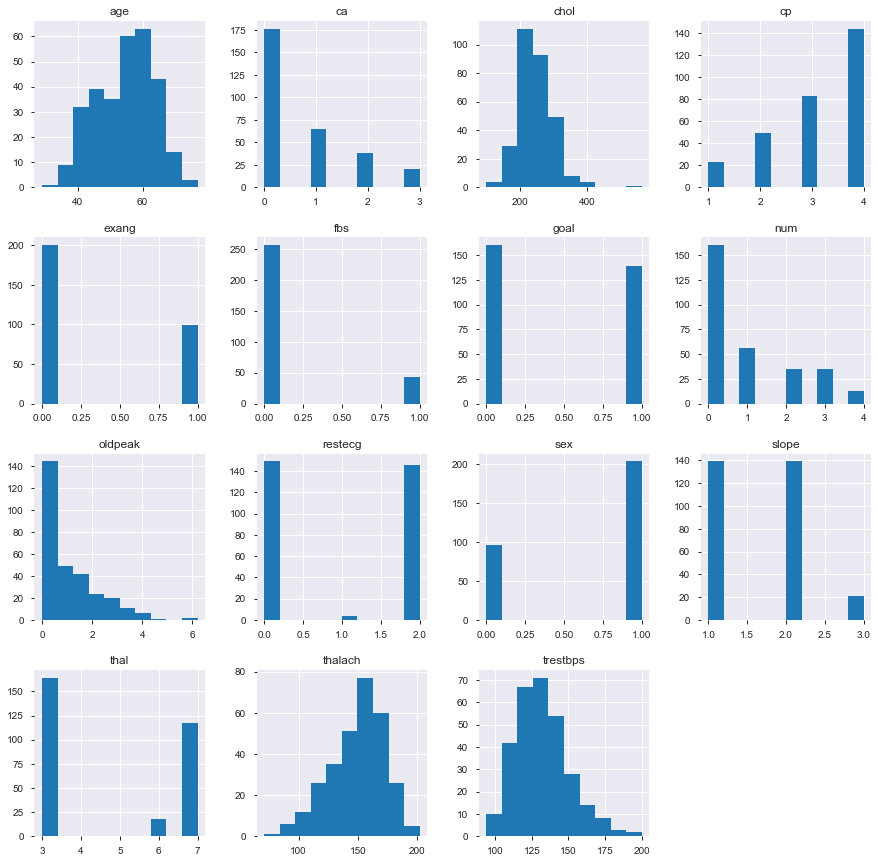

In [10]:

c = df.hist(figsize = (15,15))

Without cross validation!

In [11]:
y = df['goal']
X = df.drop(columns = ['num', 'goal'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
tf.keras.backend.set_floatx('float64')

In [13]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal','num']

In [14]:
inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in X.keys()}
x = tf.stack(list(inputs.values()), axis=-1)

x = tf.keras.layers.Dense(10,activation='sigmoid')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model_func = tf.keras.Model(inputs=inputs, outputs=output)

model_func.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


In [15]:
train_set = tf.data.Dataset.from_tensor_slices((X_train.to_dict('list'), y_train.values)).batch(20)
test_set = tf.data.Dataset.from_tensor_slices((X_test.to_dict('list'), y_test.values)).batch(10)

In [16]:
model_func.fit(train_set, epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 97ms/step - loss: 0.6883 - accuracy: 0.5700
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.6300
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6200
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.6250
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.6400
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6300
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6650
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6363 - accuracy: 0.6600
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.6650
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.6650
Epoch 11

10/10 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.7400
Epoch 84/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.7400
Epoch 85/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7400
Epoch 86/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.7400
Epoch 87/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5751 - accuracy: 0.7400
Epoch 88/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5745 - accuracy: 0.7400
Epoch 89/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5739 - accuracy: 0.7400
Epoch 90/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5733 - accuracy: 0.7400
Epoch 91/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5727 - accuracy: 0.7400
Epoch 92/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.7400
Epoch 93/100


In [17]:
model_func.evaluate(test_set)

10/10 [==============================] - 0s 15ms/step - loss: 0.5950 - accuracy: 0.7172


[0.5949600391255485, 0.7171717171717171]

In [18]:
X_train.index = range(len(X_train))
y_train.index = range(len(y_train))

With Cross Validation!

In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy as np 

def run_model(optimizer, X_train, y_train): 
    # fix random seed for reproducibility
    seed = 7
    np.random.seed(seed)
    # 
    # define 5-fold cross validation test harness
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cvscores = []
    for train, validation in kfold.split(X_train, y_train):
      # create model
        model = Sequential()
        model.add(Dense(10, input_dim=13, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        # Fit the model
        model.fit(np.array(X_train.loc[train]), np.array(y_train.loc[train]), epochs=150, batch_size=10, verbose=0)
        # evaluate the model
        scores = model.evaluate(np.array(X_train.loc[validation]), np.array(y_train.loc[validation]), verbose=0)
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    return model

def evaluate(model, X_test, y_test): 
    return model.evaluate(np.array(X_test), np.array(y_test))

In [20]:
model = run_model('adam', X_train, y_train)
evaluate(model, X_test, y_test)

accuracy: 60.98%
accuracy: 75.61%
accuracy: 75.00%
accuracy: 71.79%
accuracy: 84.62%
73.60% (+/- 7.62%)
99/1 [==========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3616054223737482, 0.8484848484848485]

In [21]:
model = run_model('RMSprop', X_train, y_train)


accuracy: 82.93%
accuracy: 73.17%
accuracy: 77.50%
accuracy: 82.05%
accuracy: 48.72%
72.87% (+/- 12.57%)


In [22]:
evaluate(model,X_test, y_test)

99/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.3263175156888771, 0.47474747474747475]

In [23]:
# My Randomized Search RF did better!

See multiclass classification, number predicted for that class/ total number of classes

confusion table for multiclass classsification

Adam is a type of stochastic gradient descent

Multiclass - classification then looking into the confusion matrix is the right thing to do.

Splitting hyperparameter tuning from evaluation and only on the training dataset.

Nested cross validation with GridSearchCV is important to tune hyperparameters.